# Data wrangling WeRateDogs
### By Mohit Patil



## Table of Contents
- [Introduction](#intro)
- [Gathering the Data](#gather)
- [Assessing the Data](#assess)
- [Assessment Summary](#ass_summary)
- [Cleaning](#clean)
- [Storing,Analyzing and Visualizing](#sav)


<a id='intro'></a>
# Introduction

The main aim of this project is Wrangling and Analyzing the dataset.The process that has been focused on is 


<font size=8>Gathering,Assessment and Cleaning</font>

The other processes are secondary concerns.

In [4]:
import pandas as pd
import requests
import os
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.3f' % x)

<a id='gather'></a>
# Gathering the Data
There are 3 main sources of the data for this particular project.

- In hand file which was available as a starting point.
- A Downloaded file which is downloaded programmatically and saved in a csv format
- Another file which was obtained by API interaction from the twitter API.

In [5]:
t_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [6]:
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

with open(os.path.join('image-predictions.tsv'), 'wb') as file:
    file.write(response.content)

In [7]:
t_predictions = pd.read_csv('image-predictions.tsv',sep='\t')

In [8]:
consumer_key = '...'
consumer_secret = '...'
access_token = '...'
access_secret = '...'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,parser=tweepy.parsers.JSONParser())

In [11]:
tweets_ids = list(t_archive['tweet_id'])

In [ ]:
tweets_data = []
tweets_missing = []
for tweet_id in tweets_ids:
    try:
        print(tweet_id)
        tweet = api.get_status(tweet_id,tweet_mode='extended',
                                  wait_on_rate_limit = True,
                                  wait_on_rate_limit_notify = True)
        tweets_data.append(tweet)
    except:
        print('Failed : ' + str(tweet_id))
        tweets_missing.append(tweet_id)
    

In [ ]:
with open('tweet_json.txt','w') as file:
    json.dump(tweets_data,file)

In [9]:
t_api = pd.read_json('tweet_json.txt')

In [10]:
t_api = t_api[['id','favorite_count','retweet_count']]

<a id='assess'></a>
# Assessing the Data

## Visual Assessment of t_archive

In [11]:
t_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,nan,nan,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,nan,nan,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,nan,nan,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,nan,nan,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,nan,nan,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,nan,nan,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,nan,nan,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,nan,nan,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,nan,nan,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,nan,nan,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


# Programmatic Assessment of t_archive

In [12]:
t_archive.shape

(2356, 17)

In [13]:
t_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
sum(t_archive['tweet_id'].duplicated())

0

In [15]:
t_archive['source'].sample(20)

750     <a href="http://twitter.com/download/iphone" r...
1694    <a href="http://twitter.com/download/iphone" r...
1062    <a href="http://vine.co" rel="nofollow">Vine -...
1510    <a href="http://twitter.com/download/iphone" r...
495     <a href="http://twitter.com/download/iphone" r...
1696    <a href="http://twitter.com/download/iphone" r...
1298    <a href="http://twitter.com/download/iphone" r...
2309    <a href="http://twitter.com/download/iphone" r...
2074    <a href="http://twitter.com/download/iphone" r...
922     <a href="http://twitter.com/download/iphone" r...
1591    <a href="http://twitter.com/download/iphone" r...
1073    <a href="http://twitter.com/download/iphone" r...
1206    <a href="http://vine.co" rel="nofollow">Vine -...
834     <a href="http://twitter.com/download/iphone" r...
682     <a href="http://twitter.com/download/iphone" r...
966     <a href="http://twitter.com/download/iphone" r...
450     <a href="http://twitter.com/download/iphone" r...
2266    <a hre

In [16]:
t_archive['in_reply_to_status_id'].value_counts()

667152164079423488.000    2
856286004109553664.000    1
813127251579564032.000    1
675497103322386432.000    1
682788441537560576.000    1
826598365270007808.000    1
678021115718029312.000    1
668920717132582912.000    1
665814696700723200.000    1
673715861853720576.000    1
759099523532779520.000    1
886266357075128320.000    1
738411919896285184.000    1
772743019447607296.000    1
746885919387574272.000    1
863425645568774144.000    1
669354382627049472.000    1
691416866452082688.000    1
692041934689402880.000    1
675349384339542016.000    1
729113531270991872.000    1
840698300298862592.000    1
674739953134403584.000    1
750180498832404480.000    1
674468880899788800.000    1
763865174553964544.000    1
674793399141146624.000    1
850328818778820608.000    1
674752233200820224.000    1
881607037314052096.000    1
                         ..
838085539362402304.000    1
821152592717697024.000    1
855861584463351808.000    1
855858535607001088.000    1
703255935813287936.0

In [17]:
t_archive['in_reply_to_user_id'].value_counts()

4196983835.000            47
21955058.000               2
730505014150582272.000     1
29166305.000               1
3105440746.000             1
291859009.000              1
279280991.000              1
2319108198.000             1
180670967.000              1
30582082.000               1
26259576.000               1
194351775.000              1
358972768.000              1
840547864354918400.000     1
2894131180.000             1
21435658.000               1
2281181600.000             1
16487760.000               1
4717297476.000             1
28785486.000               1
1582853809.000             1
467036706.000              1
47384430.000               1
13615722.000               1
15846407.000               1
20683724.000               1
16374678.000               1
11856342.000               1
1198988510.000             1
113211856.000              1
77596200.000               1
Name: in_reply_to_user_id, dtype: int64

In [18]:
t_archive['source'].sample(20)

1679    <a href="http://twitter.com/download/iphone" r...
1782    <a href="http://twitter.com/download/iphone" r...
1098    <a href="http://twitter.com/download/iphone" r...
473     <a href="http://twitter.com/download/iphone" r...
638     <a href="http://twitter.com/download/iphone" r...
711     <a href="http://twitter.com/download/iphone" r...
1356    <a href="http://twitter.com/download/iphone" r...
1634    <a href="http://twitter.com/download/iphone" r...
1367    <a href="http://twitter.com/download/iphone" r...
1759    <a href="http://twitter.com/download/iphone" r...
1707    <a href="http://twitter.com/download/iphone" r...
218     <a href="http://twitter.com/download/iphone" r...
203     <a href="http://twitter.com/download/iphone" r...
92      <a href="http://twitter.com/download/iphone" r...
991     <a href="http://twitter.com/download/iphone" r...
1671    <a href="http://twitter.com/download/iphone" r...
1343    <a href="http://twitter.com/download/iphone" r...
1085    <a hre

In [19]:
t_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [20]:
t_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

## Visual Assessment of t_predictions

In [21]:
t_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465,True,collie,0.157,True,Shetland_sheepdog,0.061,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.507,True,miniature_pinscher,0.074,True,Rhodesian_ridgeback,0.072,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596,True,malinois,0.139,True,bloodhound,0.116,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408,True,redbone,0.361,True,miniature_pinscher,0.223,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560,True,Rottweiler,0.244,True,Doberman,0.155,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651,True,English_springer,0.264,True,Greater_Swiss_Mountain_dog,0.016,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933,False,mud_turtle,0.046,False,terrapin,0.018,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.693,True,Tibetan_mastiff,0.058,True,fur_coat,0.054,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962,False,shopping_basket,0.015,False,golden_retriever,0.008,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201,True,komondor,0.192,True,soft-coated_wheaten_terrier,0.082,True


## Programmatic Assessment of t_predictions

In [22]:
t_predictions.shape

(2075, 12)

In [23]:
t_predictions['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
beagle                        18
teddy                         18
Shetland_sheepdog             18
Maltese_dog                   18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [24]:
t_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
sum(t_predictions['tweet_id'].duplicated())

0

In [26]:

t_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2075.000,2075.000,2075.000,2075.000,2075.000
mean,738451357852529152.000,1.204,0.595,0.135,0.060
std,67852033330235664.000,0.562,0.271,0.101,0.051
min,666020888022790144.000,1.000,0.044,0.000,0.000
25%,676483507139540992.000,1.000,0.364,0.054,0.016
50%,711998809858043904.000,1.000,0.588,0.118,0.049
75%,793203448525178880.000,1.000,0.844,0.196,0.092
max,892420643555336192.000,4.000,1.000,0.488,0.273



## Visual Assessment of t_api

In [27]:
t_api

,id,favorite_count,retweet_count
0,892420643555336193,38841,8601
1,892177421306343426,33266,6320
2,891815181378084864,25063,4194
3,891689557279858688,42214,8714
4,891327558926688256,40361,9486
5,891087950875897856,20244,3137
6,890971913173991426,11864,2090
7,890729181411237888,65620,19066
8,890609185150312448,27795,4300
9,890240255349198849,31983,7480


## Programmatic Assessment of t_api

In [28]:
t_api.shape

(2345, 3)

In [29]:
t_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
id                2345 non-null int64
favorite_count    2345 non-null int64
retweet_count     2345 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [30]:
sum(t_api['id'].duplicated())

0

In [31]:
t_api.describe()

,id,favorite_count,retweet_count
count,2345.000,2345.000,2345.000
mean,742294011038867840.000,8074.655,3028.823
std,68336422093579552.000,12149.250,5037.987
min,666020888022790144.000,0.000,0.000
25%,678380236862578688.000,1406.000,607.000
50%,718939241951195136.000,3540.000,1414.000
75%,798697898615730176.000,9977.000,3529.000
max,892420643555336192.000,143519.000,77435.000


<a id='ass_summary'></a> 
# Assessment Summary 

###  Quality Issuses :
####  t_archive
- The tweet_id column can be converted to string in order to avoid accidental alterations.
- The columns in_reply_status_id and in_reply_to_user_id consist of large amount of null values and are not important to our data analysis.
- Timestamp can be converted to DateTime object as datatype.
- Source has html tag a which has be removed in order to get only the source url.
- There are 181 retweets that must be deleted in order to avoid redundancy.
- The numerator ratings are not up to the mark,Maximum feasible value can be considered as 15 but beyond these limits the ratings are not possible and hence we would need to delete these.
- The denominator must be 10 and hence other records having score other than out of 10 must be deleted.
- There are some strange names like 'a','None','one' which possibly aren't names but a kind of error in the dataset.

#### t_predictions
- The tweet_id has to be converted to a string type.
- Some predictions are missing in the t_predictions column as compared to the tweet_ids of t_archive

#### t_api
- The id column has to be renamed to tweet_id in order to maintain uniformity.

### Tidiness Issues :
- The columns doggo,fluffer,pupper and puppo in t_archive are to be converted to a single column.
- The two dataframes t_archive and t_predictions are to be matched in order to compare the predictions.
- The two dataframes t_archive and t_api are to be matched in order to fill up the missing columns
- Thus all the three dataframes must be combined into one dataframe to get a better understanding of the dataset.

<a id='clean'></a>
# Cleaning

In [32]:
t_archive_clean = t_archive.copy()

In [33]:
t_predictions_clean = t_predictions.copy()
t_api_clean = t_api.copy()

#### Tidiness issue 1 :  The columns doggo,fluffer,pupper and puppo in t_archive are to be converted to a single column.

In [34]:
t_archive_clean = pd.melt(t_archive_clean,id_vars=['tweet_id', 'in_reply_to_status_id','in_reply_to_user_id','timestamp', 'source', 'text', 'retweeted_status_id','retweeted_status_user_id', 
                                 'retweeted_status_timestamp',
                                 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'])

In [35]:
t_archive_clean.drop('variable',inplace=True,axis=1)

In [36]:
t_archive_clean[t_archive_clean['value'] != "None"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,value
9,890240255349198849,nan,nan,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,nan,nan,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
43,884162670584377345,nan,nan,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,nan,nan,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo
99,872967104147763200,nan,nan,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,nan,nan,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo
108,871515927908634625,nan,nan,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,nan,nan,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo
110,871102520638267392,nan,nan,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,nan,nan,NaN,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo
121,869596645499047938,nan,nan,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,nan,nan,NaN,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo
172,858843525470990336,nan,nan,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,nan,nan,NaN,https://twitter.com/dog_rates/status/858843525...,13,10,None,doggo
191,855851453814013952,nan,nan,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,nan,nan,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo
200,854010172552949760,nan,nan,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",nan,nan,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo
211,851953902622658560,nan,nan,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,829374341691346944.000,4196983835.000,2017-02-08 17:00:26 +0000,https://twitter.com/dog_rates/status/829374341...,13,10,Astrid,doggo


In [37]:
t_archive_clean.sort_values('value')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,value
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
6257,689289219123089408,nan,nan,2016-01-19 03:32:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone sent me this without any context and e...,nan,nan,NaN,https://twitter.com/dog_rates/status/689289219...,13,10,None,None
6256,689517482558820352,nan,nan,2016-01-19 18:39:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carl. He just wants to make sure you'r...,nan,nan,NaN,https://twitter.com/dog_rates/status/689517482...,12,10,Carl,None
6255,689557536375177216,nan,nan,2016-01-19 21:18:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Downright majestic af 12/10 https://t.co/WFh2F...,nan,nan,NaN,https://twitter.com/dog_rates/status/689557536...,12,10,None,None
6254,689599056876867584,nan,nan,2016-01-20 00:03:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see 33 dogs posing for a picture. All ...,nan,nan,NaN,https://twitter.com/dog_rates/status/689599056...,11,10,None,None
6252,689659372465688576,nan,nan,2016-01-20 04:03:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ricky. He's being escorted out of the ...,nan,nan,NaN,https://twitter.com/dog_rates/status/689659372...,8,10,Ricky,None
6251,689661964914655233,nan,nan,2016-01-20 04:13:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Luca. He's a Butternut Scooperfloof. Glor...,nan,nan,NaN,https://twitter.com/dog_rates/status/689661964...,12,10,Luca,None
6250,689835978131935233,nan,nan,2016-01-20 15:44:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fynn &amp; Taco. Fynn is an all-powerful ...,nan,nan,NaN,https://twitter.com/dog_rates/status/689835978...,11,10,Fynn,None
6249,689877686181715968,nan,nan,2016-01-20 18:30:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Durg. He's trying to conquer his fear ...,nan,nan,NaN,https://twitter.com/dog_rates/status/689877686...,9,10,Durg,None
6247,689977555533848577,nan,nan,2016-01-21 01:07:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a pup wearing a beret. ...,nan,nan,NaN,https://twitter.com/dog_rates/status/689977555...,12,10,None,None


In [38]:
t_archive_clean = t_archive_clean.sort_values('value').drop_duplicates(subset='tweet_id', keep='last')

In [39]:
t_archive_clean[t_archive_clean['value'] != "None"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,value
240,846514051647705089,nan,nan,2017-03-28 00:07:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Barney. He's an elder doggo. Hitches a...,nan,nan,NaN,https://twitter.com/dog_rates/status/846514051...,13,10,Barney,doggo
807,771908950375665664,nan,nan,2016-09-03 03:13:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Doggo will persevere. 13/10\nhttps://t.co/yOVz...,nan,nan,NaN,https://twitter.com/yahoonews/status/771905568...,13,10,None,doggo
780,775733305207554048,nan,nan,2016-09-13 16:30:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Anakin. He strives to reach his full d...,nan,nan,NaN,https://twitter.com/dog_rates/status/775733305...,11,10,Anakin,doggo
698,786363235746385920,nan,nan,2016-10-13 00:29:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rizzo. He has many talents. A true ren...,nan,nan,NaN,https://twitter.com/dog_rates/status/786363235...,13,10,Rizzo,doggo
344,832032802820481025,nan,nan,2017-02-16 01:04:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Miguel. He was the only remaining dogg...,nan,nan,NaN,"https://www.petfinder.com/petdetail/34918210,h...",12,10,Miguel,doggo
345,831939777352105988,nan,nan,2017-02-15 18:54:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emanuel. He's a h*ckin rare doggo. Dwe...,nan,nan,NaN,https://twitter.com/dog_rates/status/831939777...,12,10,Emanuel,doggo
300,836753516572119041,nan,nan,2017-03-01 01:42:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Meera. She just heard about taxes and ...,nan,nan,NaN,https://twitter.com/dog_rates/status/836753516...,12,10,Meera,doggo
731,781655249211752448,nan,nan,2016-09-30 00:41:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Combo. The daily struggles of being a ...,nan,nan,NaN,https://vine.co/v/5rt6T3qm7hL,11,10,Combo,doggo
43,884162670584377345,nan,nan,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,nan,nan,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo
351,831322785565769729,nan,nan,2017-02-14 02:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pete. He has no eyes. Needs a guide do...,nan,nan,NaN,https://twitter.com/dog_rates/status/831322785...,12,10,Pete,doggo


In [40]:
t_archive_clean.rename(columns = {'value' : 'dog_type'},inplace=True)

In [41]:
t_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_type'],
      dtype='object')

#### Tidiness issue 2 : The two dataframes t_archive and t_predictions are to be matched in order to compare the predictions.

In [42]:
t_archive_clean.merge(t_predictions,how='left',on='tweet_id')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,667550904950915073,nan,nan,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,667548695664070656.000,4296831739.000,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,...,1.000,web_site,0.999,False,vizsla,0.000,True,collie,0.000,True
1,667550882905632768,nan,nan,2015-11-20 03:51:47 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,667548415174144000.000,4296831739.000,2015-11-20 03:41:59 +0000,https://twitter.com/dogratingrating/status/667...,...,1.000,web_site,0.998,False,dishwasher,0.000,False,oscilloscope,0.000,False
2,667549055577362432,nan,nan,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,nan,nan,NaN,https://twitter.com/dog_rates/status/667549055...,...,1.000,electric_fan,0.984,False,spotlight,0.008,False,lampshade,0.002,False
3,667546741521195010,nan,nan,2015-11-20 03:35:20 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Here is George. George took a selfie of his ne...,nan,nan,NaN,https://twitter.com/dog_rates/status/667546741...,...,1.000,toy_poodle,0.787,True,miniature_poodle,0.202,True,teddy,0.004,False
4,667544320556335104,nan,nan,2015-11-20 03:25:43 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Kial. Kial is either wearing a cape, w...",nan,nan,NaN,https://twitter.com/dog_rates/status/667544320...,...,1.000,Pomeranian,0.413,True,Pembroke,0.313,True,Chihuahua,0.072,True
5,667538891197542400,nan,nan,2015-11-20 03:04:08 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a southwest Coriander named Klint. Hat...,nan,nan,NaN,https://twitter.com/dog_rates/status/667538891...,...,1.000,Yorkshire_terrier,0.619,True,silky_terrier,0.300,True,Australian_terrier,0.053,True
6,667724302356258817,nan,nan,2015-11-20 15:20:54 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",What a dog to start the day with. Very calm. L...,nan,nan,NaN,https://twitter.com/dog_rates/status/667724302...,...,1.000,ibex,0.619,False,bighorn,0.125,False,ram,0.075,False
7,667534815156183040,nan,nan,2015-11-20 02:47:56 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Frank (pronounced ""Fronq""). Too many b...",nan,nan,NaN,https://twitter.com/dog_rates/status/667534815...,...,1.000,Pembroke,0.435,True,Cardigan,0.307,True,cocker_spaniel,0.033,True
8,667524857454854144,nan,nan,2015-11-20 02:08:22 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Another topnotch dog. His name is Big Jumpy Ra...,nan,nan,NaN,https://twitter.com/dog_rates/status/667524857...,...,1.000,hare,0.448,False,dhole,0.092,False,Chesapeake_Bay_retriever,0.088,True
9,667517642048163840,nan,nan,2015-11-20 01:39:42 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Dook &amp; Milo. Dook is struggling to...,nan,nan,NaN,https://twitter.com/dog_rates/status/667517642...,...,1.000,Italian_greyhound,0.125,True,standard_poodle,0.085,True,cocker_spaniel,0.081,True


In [43]:
t_clean = t_archive_clean.merge(t_predictions,how='left',on='tweet_id')

#### Tidiness issue 3 : The two dataframes t_archive and t_api are to be matched in order to fill up the missing columns

In [44]:
t_clean.merge(t_api, how='left',right_on='id',left_on='tweet_id')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,favorite_count,retweet_count
0,667550904950915073,nan,nan,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,667548695664070656.000,4296831739.000,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,...,False,vizsla,0.000,True,collie,0.000,True,667550904950915072.000,0.000,35.000
1,667550882905632768,nan,nan,2015-11-20 03:51:47 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,667548415174144000.000,4296831739.000,2015-11-20 03:41:59 +0000,https://twitter.com/dogratingrating/status/667...,...,False,dishwasher,0.000,False,oscilloscope,0.000,False,667550882905632768.000,0.000,33.000
2,667549055577362432,nan,nan,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,nan,nan,NaN,https://twitter.com/dog_rates/status/667549055...,...,False,spotlight,0.008,False,lampshade,0.002,False,667549055577362432.000,5984.000,2396.000
3,667546741521195010,nan,nan,2015-11-20 03:35:20 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Here is George. George took a selfie of his ne...,nan,nan,NaN,https://twitter.com/dog_rates/status/667546741...,...,True,miniature_poodle,0.202,True,teddy,0.004,False,667546741521195008.000,342.000,132.000
4,667544320556335104,nan,nan,2015-11-20 03:25:43 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Kial. Kial is either wearing a cape, w...",nan,nan,NaN,https://twitter.com/dog_rates/status/667544320...,...,True,Pembroke,0.313,True,Chihuahua,0.072,True,667544320556335104.000,895.000,549.000
5,667538891197542400,nan,nan,2015-11-20 03:04:08 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a southwest Coriander named Klint. Hat...,nan,nan,NaN,https://twitter.com/dog_rates/status/667538891...,...,True,silky_terrier,0.300,True,Australian_terrier,0.053,True,667538891197542400.000,209.000,70.000
6,667724302356258817,nan,nan,2015-11-20 15:20:54 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",What a dog to start the day with. Very calm. L...,nan,nan,NaN,https://twitter.com/dog_rates/status/667724302...,...,False,bighorn,0.125,False,ram,0.075,False,667724302356258816.000,504.000,332.000
7,667534815156183040,nan,nan,2015-11-20 02:47:56 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Frank (pronounced ""Fronq""). Too many b...",nan,nan,NaN,https://twitter.com/dog_rates/status/667534815...,...,True,Cardigan,0.307,True,cocker_spaniel,0.033,True,667534815156183040.000,844.000,561.000
8,667524857454854144,nan,nan,2015-11-20 02:08:22 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Another topnotch dog. His name is Big Jumpy Ra...,nan,nan,NaN,https://twitter.com/dog_rates/status/667524857...,...,False,dhole,0.092,False,Chesapeake_Bay_retriever,0.088,True,667524857454854144.000,1752.000,1167.000
9,667517642048163840,nan,nan,2015-11-20 01:39:42 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Dook &amp; Milo. Dook is struggling to...,nan,nan,NaN,https://twitter.com/dog_rates/status/667517642...,...,True,standard_poodle,0.085,True,cocker_spaniel,0.081,True,667517642048163840.000,379.000,198.000


#### Quality issue 1 :  The tweet_id column can be converted to string in order to avoid accidental alterations.

In [45]:
t_clean['tweet_id'] = t_clean['tweet_id'].astype(str)

In [46]:
t_clean.dtypes

tweet_id                       object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
dog_type                       object
jpg_url                        object
img_num                       float64
p1                             object
p1_conf                       float64
p1_dog                         object
p2                             object
p2_conf                       float64
p2_dog                         object
p3                             object
p3_conf                       float64
p3_dog                         object
dtype: object

#### Quality issue 2 : The columns in_reply_status_id and in_reply_to_user_id consist of large amount of null values and are not important to our data analysis.

In [47]:
t_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'],inplace=True,axis=1)

In [48]:
t_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dog_type', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

#### Quality issue 3 : - Timestamp can be converted to DateTime object as datatype.

In [49]:
t_clean['timestamp'] = pd.to_datetime(t_clean['timestamp'])

In [50]:
t_clean.dtypes

tweet_id                              object
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
dog_type                              object
jpg_url                               object
img_num                              float64
p1                                    object
p1_conf                              float64
p1_dog                                object
p2                                    object
p2_conf                              float64
p2_dog                                object
p3                                    object
p3_conf                              float64
p3_dog    

#### Quality issue 4 : Source has html tag a which has be removed in order to get only the source url.

In [51]:
t_clean['source'] = t_clean['source'].str.split('"').str[1]

In [52]:
t_clean['source'].head()

0    http://twitter.com
1    http://twitter.com
2    http://twitter.com
3    http://twitter.com
4    http://twitter.com
Name: source, dtype: object

#### Quality issue 5 : - There are 181 retweets that must be deleted in order to avoid redundancy.

In [53]:
t_clean[t_clean.retweeted_status_timestamp.notnull()]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,667550904950915073,2015-11-20 03:51:52,http://twitter.com,RT @dogratingrating: Exceptional talent. Origi...,667548695664070656.000,4296831739.000,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,...,1.000,web_site,0.999,False,vizsla,0.000,True,collie,0.000,True
1,667550882905632768,2015-11-20 03:51:47,http://twitter.com,RT @dogratingrating: Unoriginal idea. Blatant ...,667548415174144000.000,4296831739.000,2015-11-20 03:41:59 +0000,https://twitter.com/dogratingrating/status/667...,5,10,...,1.000,web_site,0.998,False,dishwasher,0.000,False,oscilloscope,0.000,False
148,872668790621863937,2017-06-08 04:17:07,http://twitter.com/download/iphone,RT @loganamnosis: Penelope here is doing me qu...,872657584259551232.000,154767397.000,2017-06-08 03:32:35 +0000,https://twitter.com/loganamnosis/status/872657...,14,10,...,nan,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN
150,873697596434513921,2017-06-11 00:25:14,http://twitter.com/download/iphone,RT @dog_rates: This is Walter. He won't start ...,868880397819494400.000,4196983835.000,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,...,1.000,laptop,0.154,False,French_bulldog,0.100,True,printer,0.077,False
165,874434818259525634,2017-06-13 01:14:41,http://twitter.com/download/iphone,RT @dog_rates: This is Coco. At first I though...,866334964761202688.000,4196983835.000,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,...,nan,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN
168,878404777348136964,2017-06-24 00:09:53,http://twitter.com/download/iphone,RT @dog_rates: Meet Shadow. In an attempt to r...,878281511006478336.000,4196983835.000,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,...,nan,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN
179,886054160059072513,2017-07-15 02:45:48,http://twitter.com/download/iphone,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,886053734421102592.000,19607400.000,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,...,nan,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN
183,888202515573088257,2017-07-21 01:02:36,http://twitter.com/download/iphone,RT @dog_rates: This is Canela. She attempted s...,887473957103951872.000,4196983835.000,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,...,2.000,Pembroke,0.809,True,Rhodesian_ridgeback,0.055,True,beagle,0.039,True
200,878316110768087041,2017-06-23 18:17:33,http://twitter.com/download/iphone,RT @dog_rates: Meet Terrance. He's being yelle...,669000397445533696.000,4196983835.000,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,...,nan,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN
201,885311592912609280,2017-07-13 01:35:06,http://twitter.com/download/iphone,RT @dog_rates: This is Lilly. She just paralle...,830583320585068544.000,4196983835.000,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,...,1.000,Labrador_retriever,0.909,True,seat_belt,0.057,False,pug,0.012,True


In [54]:
t_clean.drop(t_clean[t_clean.retweeted_status_timestamp.notnull()].index,inplace=True)

In [55]:
t_clean[t_clean.retweeted_status_timestamp.notnull()]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [56]:
t_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],inplace=True,axis=1)

In [57]:
t_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_type', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog'],
      dtype='object')

In [58]:
t_clean.shape

(2175, 20)

#### Quality issue 6 : The numerator ratings are not up to the mark,Maximum feasible value can be considered as 15 but beyond these limits the ratings are not possible and hence we would need to delete these.

In [59]:
t_clean[t_clean.rating_numerator > 15]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
218,881633300179243008,2017-07-02 21:58:53,http://twitter.com/download/iphone,@roushfenway These are good dogs but 17/10 is ...,NaN,17,10,None,None,NaN,nan,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN
255,697463031882764288,2016-02-10 16:51:59,http://twitter.com/download/iphone,Happy Wednesday here's a bucket of pups. 44/40...,https://twitter.com/dog_rates/status/697463031...,44,40,None,None,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg,1.000,Labrador_retriever,1.000,True,golden_retriever,0.000,True,pug,0.000,True
348,704054845121142784,2016-02-28 21:25:30,http://twitter.com/download/iphone,Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1.000,Great_Pyrenees,0.668,True,kuvasz,0.229,True,golden_retriever,0.044,True
384,684225744407494656,2016-01-05 04:11:44,http://twitter.com/download/iphone,"Two sneaky puppers were not initially seen, mo...",https://twitter.com/dog_rates/status/684225744...,143,130,None,None,https://pbs.twimg.com/media/CX7br3HWsAAQ9L1.jpg,2.000,golden_retriever,0.203,True,Samoyed,0.068,True,Great_Pyrenees,0.065,True
385,684222868335505415,2016-01-05 04:00:18,http://twitter.com/download/iphone,Someone help the girl is being mugged. Several...,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,1.000,soft-coated_wheaten_terrier,0.791,True,cocker_spaniel,0.072,True,teddy,0.071,False
497,716439118184652801,2016-04-03 01:36:11,http://twitter.com/download/iphone,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1.000,Siberian_husky,0.396,True,malamute,0.317,True,Eskimo_dog,0.273,True
545,731156023742988288,2016-05-13 16:15:54,http://twitter.com/download/iphone,Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1.000,lakeside,0.502,False,breakwater,0.051,False,king_penguin,0.049,False
639,713900603437621249,2016-03-27 01:29:02,http://twitter.com/download/iphone,Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1.000,golden_retriever,0.372,True,cocker_spaniel,0.177,True,Irish_setter,0.093,True
682,709198395643068416,2016-03-14 02:04:08,http://twitter.com/download/iphone,"From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,None,None,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1.000,borzoi,0.491,True,wire-haired_fox_terrier,0.084,True,English_setter,0.083,True
697,710658690886586372,2016-03-18 02:46:49,http://twitter.com/download/iphone,Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1.000,soft-coated_wheaten_terrier,0.949,True,Dandie_Dinmont,0.019,True,cairn,0.016,True


In [60]:
t_clean.drop(t_clean[t_clean.rating_numerator > 15].index,inplace=True)

In [61]:
sum(t_clean['rating_numerator'] > 15)

0

#### Quality issue 7 : The denominator must be 10 and hence other records having score other than out of 10 must be deleted.

In [62]:
t_clean[t_clean['rating_denominator'] != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,666287406224695296,2015-11-16 16:11:11,http://twitter.com/download/iphone,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1.000,Maltese_dog,0.858,True,toy_poodle,0.063,True,miniature_poodle,0.026,True
350,686035780142297088,2016-01-10 04:04:10,http://twitter.com/download/iphone,Yes I do realize a rating of 4/20 would've bee...,NaN,4,20,None,None,NaN,nan,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN
464,722974582966214656,2016-04-21 02:25:47,http://twitter.com/download/iphone,Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1.000,Great_Dane,0.247,True,Greater_Swiss_Mountain_dog,0.126,True,Weimaraner,0.085,True
534,740373189193256964,2016-06-08 02:41:38,http://twitter.com/download/iphone,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,None,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3.000,golden_retriever,0.808,True,kuvasz,0.101,True,Labrador_retriever,0.024,True
1029,682962037429899265,2016-01-01 16:30:13,http://twitter.com/download/iphone,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1.000,dingo,0.279,False,Chihuahua,0.155,True,loupe,0.154,False
1559,832088576586297345,2017-02-16 04:45:50,http://twitter.com/download/iphone,@docmisterio account started on 11/15/15,NaN,11,15,None,None,NaN,nan,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN


In [63]:
t_clean.drop(t_clean[t_clean['rating_denominator'] != 10].index,inplace=True)

In [64]:
t_clean[t_clean['rating_denominator'] != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Quality issue 8 : - There are some strange names like 'a','None','one' which possibly aren't names but a kind of error in the dataset.

#### The names do not play an important role in the analysis and hence, we need not fix this issue.

#### Names do not matter in this dataset and hence we can bear with this data.But if our analysis would have been closely related to these.We could have taken 2 possible measures :

- Try and find the names if possible by certain means.
- Observing the trends and predicting the names if the number of missing names were nominal.
- At last,If the names cannot be found and predictions are baseless we would have to drop those records.

In [65]:
t_clean['tweet_id'] = t_clean['tweet_id'].astype(str)

In [66]:
t_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
dog_type                      object
jpg_url                       object
img_num                      float64
p1                            object
p1_conf                      float64
p1_dog                        object
p2                            object
p2_conf                      float64
p2_dog                        object
p3                            object
p3_conf                      float64
p3_dog                        object
dtype: object

#### Some predictions are missing as compared to the t_archive tweet_ids.We can resolve this issue by merging the two dataframes on the tweet_id being the feature on which we merge.The missing values would automatically be dropped and we would get a corresponding combined dataframe.  

In [67]:
t_clean['tweet_id'] = t_api_clean['id'].astype(str)

In [68]:
t_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_type', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog'],
      dtype='object')

In [69]:
t_clean.drop(t_clean[t_clean['tweet_id'].isnull()].index,inplace=True)

In [70]:
t_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2135 entries, 2 to 2344
Data columns (total 20 columns):
tweet_id              2135 non-null object
timestamp             2135 non-null datetime64[ns]
source                2135 non-null object
text                  2135 non-null object
expanded_urls         2085 non-null object
rating_numerator      2135 non-null int64
rating_denominator    2135 non-null int64
name                  2135 non-null object
dog_type              2135 non-null object
jpg_url               1963 non-null object
img_num               1963 non-null float64
p1                    1963 non-null object
p1_conf               1963 non-null float64
p1_dog                1963 non-null object
p2                    1963 non-null object
p2_conf               1963 non-null float64
p2_dog                1963 non-null object
p3                    1963 non-null object
p3_conf               1963 non-null float64
p3_dog                1963 non-null object
dtypes: datetime64[ns](

#### If the data is only being used for predictional analysis and not for any other analysis we can drop the other records which dont have predictions for the specific tweets.This is demonstrated below.

In [71]:
t_clean_predictions = t_clean.drop(t_clean[t_clean['p1'].isnull()].index)

In [72]:
t_clean_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 2 to 2344
Data columns (total 20 columns):
tweet_id              1963 non-null object
timestamp             1963 non-null datetime64[ns]
source                1963 non-null object
text                  1963 non-null object
expanded_urls         1963 non-null object
rating_numerator      1963 non-null int64
rating_denominator    1963 non-null int64
name                  1963 non-null object
dog_type              1963 non-null object
jpg_url               1963 non-null object
img_num               1963 non-null float64
p1                    1963 non-null object
p1_conf               1963 non-null float64
p1_dog                1963 non-null object
p2                    1963 non-null object
p2_conf               1963 non-null float64
p2_dog                1963 non-null object
p3                    1963 non-null object
p3_conf               1963 non-null float64
p3_dog                1963 non-null object
dtypes: datetime64[ns](

#### As you can see the data is much more clean and the columns are uniform and are of correct datatypes.Besides this there is no missing data and every column has same number of values.

<a id='sav'></a>
# Storing,Analyzing and Visualizing data

In [73]:
t_clean_predictions.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

#### 1] Which are the most commonly predicted dog breeds?

In [74]:
common_breed = t_clean_predictions[t_clean_predictions['p1_dog']]['p1'].value_counts().reset_index()
common_breed = common_breed.head(10)
common_breed

,index,p1
0,golden_retriever,134
1,Labrador_retriever,92
2,Pembroke,88
3,Chihuahua,79
4,pug,54
5,chow,41
6,Samoyed,40
7,toy_poodle,38
8,Pomeranian,37
9,malamute,29


Text(0,0.5,'Number of Predictions')

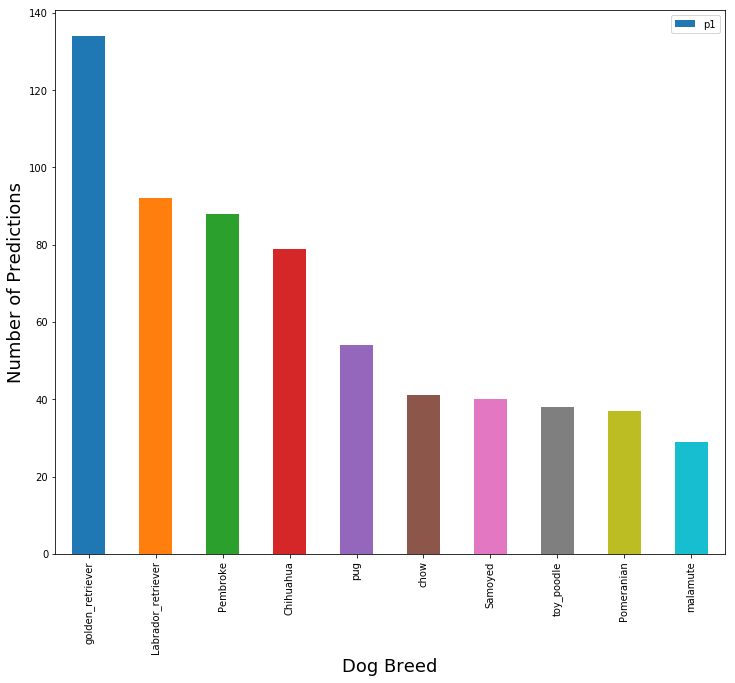

In [75]:
common_breed.plot('index','p1',kind='bar',figsize=(12,10))
plt.xlabel('Dog Breed',fontsize=18)
plt.ylabel('Number of Predictions',fontsize=18)

## Insight 1 : The golden retriever is the most commonly predicted dog breed followed by Labrador retriever and Pembroke. 

####  2] How does the highest average rating for predicted dogs vary?

In [76]:
rating_breed = t_clean_predictions[t_clean_predictions['p1_dog']].groupby('p1')['rating_numerator'].mean().reset_index()
rating_breed

,p1,rating_numerator
0,Afghan_hound,9.667
1,Airedale,9.833
2,American_Staffordshire_terrier,11.000
3,Appenzeller,11.000
4,Australian_terrier,11.500
5,Bedlington_terrier,10.000
6,Bernese_mountain_dog,11.200
7,Blenheim_spaniel,11.100
8,Border_collie,10.583
9,Border_terrier,12.143


In [77]:
rating_breed = rating_breed.sort_values('rating_numerator',ascending=False)
rating_breed

,p1,rating_numerator
52,Saluki,12.500
76,briard,12.333
61,Tibetan_mastiff,12.250
9,Border_terrier,12.143
85,giant_schnauzer,12.000
101,silky_terrier,12.000
104,standard_schnauzer,12.000
21,Eskimo_dog,11.750
30,Irish_setter,11.750
25,Gordon_setter,11.750


In [78]:
rating_breed = rating_breed.head(10)

Text(0.5,1,'Dog Breed Vs Rating')

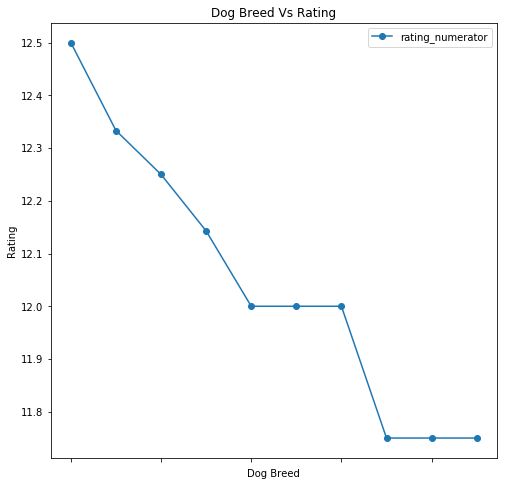

In [83]:
rating_breed.plot('p1','rating_numerator',marker='o',figsize=(8,8))
plt.xticks(label=rating_breed['p1'],rotation=90)
plt.xlabel('Dog Breed')
plt.ylabel('Rating')
plt.title('Dog Breed Vs Rating')

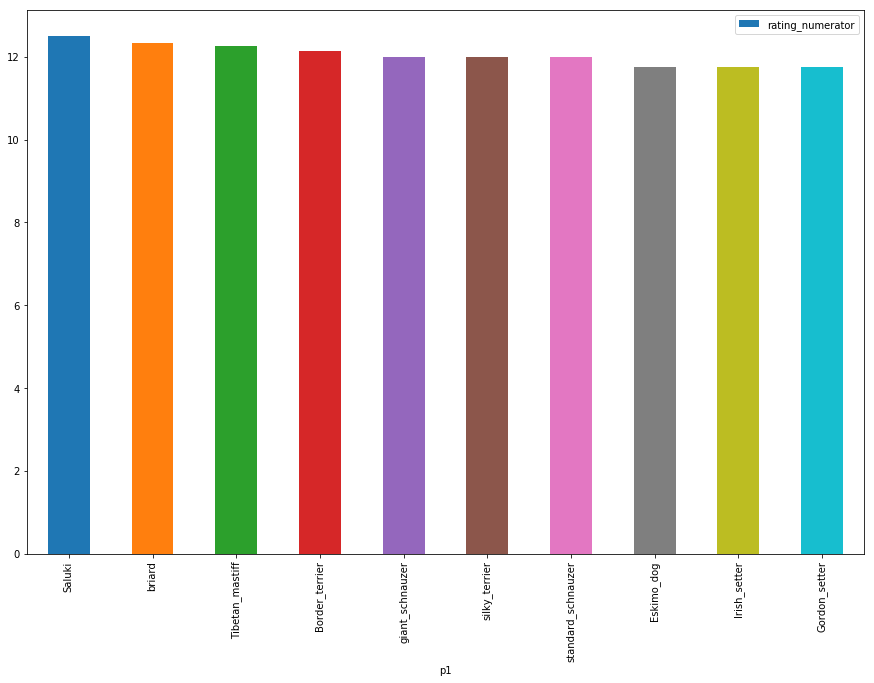

In [80]:
rating_breed.plot('p1','rating_numerator',kind='bar',figsize=(15,10))

## The highest average rating is quite steep and hence not many dogs get a high rating of 12.5.The highest rated dog is Saluki which is 12.5 and It is followed by the briard and Tibetan mastiff.

#### How does the confidence interval for the first,second and third prediction vary?

In [81]:
conf = t_clean_predictions[['p1_conf','p2_conf','p3_conf']].mean().reset_index()

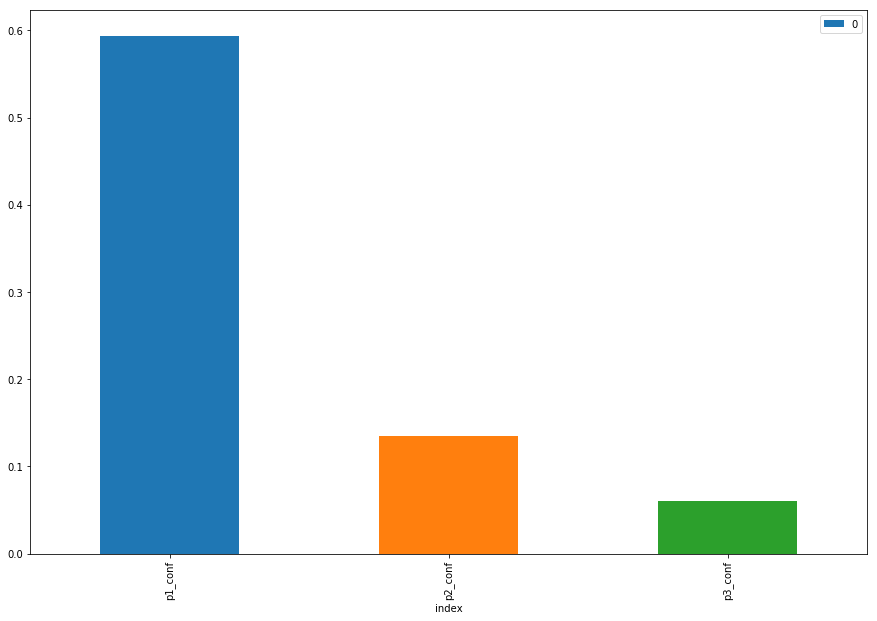

In [82]:
conf.plot('index',0,kind='bar',figsize=(15,10))

#### As we move to the second and the third prediction the confidence intervals decrease in an irregular fashion.The first prediction has the highest confident interval.